# Analisis ventas de articulos de la sucursal Av México

In [1]:
# Importar ventas de artículos de la sucursal Av Mexico
import pandas as pd
import os
import re
from Funciones import menu_dict, alias_dict
# Ruta relativa desde Jupyter
carpeta = r'Ventas-articulos\Av Mexico'
dataframes = []

# Mapeo de meses en español a inglés
meses_es_en = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

# Expresión regular para capturar día y mes
patron_fecha = re.compile(r'(\d{1,2})\s(\w+)')  # ej. '1 junio'

# Claficidar los articulos 
import unicodedata
from difflib import get_close_matches

# Paso 1: Normaliza texto
def normalizar_texto(texto):
    texto = texto.upper().strip()
    texto = unicodedata.normalize("NFKD", texto).encode("ASCII", "ignore").decode("utf-8")
    return texto

# Paso 2: Normaliza claves del menú
menu_dict_normalizado = {
    normalizar_texto(k): v for k, v in menu_dict.items()
}

alias_dict_normalizado = {
    normalizar_texto(k): normalizar_texto(v) for k, v in alias_dict.items()
}

for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv') and 'Av Mexico' in archivo:
        ruta_archivo = os.path.join(carpeta, archivo)
        df = pd.read_csv(ruta_archivo)

        # Extraer día y mes
        match = patron_fecha.search(archivo)
        if match:
            dia = match.group(1)
            mes_es = match.group(2).lower()
            mes_en = meses_es_en.get(mes_es, 'January')
            fecha_str = f'{dia} {mes_en} 2025'

            try:
                fecha_dt = pd.to_datetime(fecha_str, format='%d %B %Y')
            except:
                fecha_dt = None
        else:
            fecha_dt = None

        df['fecha'] = fecha_dt
        df['sucursal'] = 'Av Mexico'
        dataframes.append(df)

# Unir todos los DataFrames
df_ventas = pd.concat(dataframes, ignore_index=True)
df_ventas.sort_values(by='fecha', inplace=True)
df_ventas = df_ventas[['fecha','sucursal','ARTICULO','cod','VENTAS']].copy()
# Reemplazar nombres usando alias_dict
df_ventas["ARTICULO_MODIFICADO"] = df_ventas["ARTICULO"].replace(alias_dict)
df_ventas
# Verificamos
#print(df_ventas[['ARTICULO', 'cod', 'VENTAS', 'fecha', 'sucursal']].head())



fecha   sucursal                 ARTICULO   cod  VENTAS  \
297  2025-05-01  Av Mexico           MOJITO S LICOR  1609     4.0   
267  2025-05-01  Av Mexico         TIRADITO DE ATUN   421     6.0   
266  2025-05-01  Av Mexico             AGUA PERRIER   835     7.0   
265  2025-05-01  Av Mexico   AGUACH GRAN DUENDE CAM   205     7.0   
264  2025-05-01  Av Mexico  COP C MADERO CHARDONNAY  2341     7.0   
...         ...        ...                      ...   ...     ...   
6134 2025-06-25  Av Mexico            PASION MEZCAL   946     2.0   
6133 2025-06-25  Av Mexico                  GIN MOM   928     2.0   
6132 2025-06-25  Av Mexico                 TACO CHE   602     2.0   
6130 2025-06-25  Av Mexico          CAMARON NATURAL   215     2.0   
6075 2025-06-25  Av Mexico         TOSTADA ESP. CAM    18     6.0   

               ARTICULO_MODIFICADO  
297   Fresa, Jengibre, Hierbabuena  
267               Tiradito de Atún  
266                   AGUA PERRIER  
265         AGUACH GRAN DUENDE CAM  
264        COP C MADERO CHARDONNAY  
...                            ...  
6134                 PASIÓN MEZCAL  
6133                       GIN MOM  
6132                           Che  
6130               CAMARON NATURAL  
6075           Especial de Camarón  

[9947 rows x 6 columns]

In [2]:


# Lista de nombres normalizados en el menú
nombres_menu = list(menu_dict_normalizado.keys())

# Paso 3: Función para buscar coincidencia más cercana
def obtener_info_articulo(nombre_articulo):
    nombre_normalizado = normalizar_texto(nombre_articulo)
    
    if nombre_normalizado in menu_dict_normalizado:
        return menu_dict_normalizado[nombre_normalizado]
    
    # Opcional: registrar nombre no encontrado
    #print(f"❗Artículo no encontrado en menú: {nombre_articulo}")
    return {}

# Paso 4: Aplicar a columnas nuevas
df_ventas['clasificacion'] = df_ventas['ARTICULO_MODIFICADO'].map(lambda x: obtener_info_articulo(x).get('clasificacion'))
df_ventas['precio'] = df_ventas['ARTICULO_MODIFICADO'].map(lambda x: obtener_info_articulo(x).get('precio'))
df_ventas['gramos'] = df_ventas['ARTICULO_MODIFICADO'].map(lambda x: obtener_info_articulo(x).get('gramos'))
df_ventas['descripcion'] = df_ventas['ARTICULO_MODIFICADO'].map(lambda x: obtener_info_articulo(x).get('descripcion'))
df_ventas


fecha   sucursal                 ARTICULO   cod  VENTAS  \
297  2025-05-01  Av Mexico           MOJITO S LICOR  1609     4.0   
267  2025-05-01  Av Mexico         TIRADITO DE ATUN   421     6.0   
266  2025-05-01  Av Mexico             AGUA PERRIER   835     7.0   
265  2025-05-01  Av Mexico   AGUACH GRAN DUENDE CAM   205     7.0   
264  2025-05-01  Av Mexico  COP C MADERO CHARDONNAY  2341     7.0   
...         ...        ...                      ...   ...     ...   
6134 2025-06-25  Av Mexico            PASION MEZCAL   946     2.0   
6133 2025-06-25  Av Mexico                  GIN MOM   928     2.0   
6132 2025-06-25  Av Mexico                 TACO CHE   602     2.0   
6130 2025-06-25  Av Mexico          CAMARON NATURAL   215     2.0   
6075 2025-06-25  Av Mexico         TOSTADA ESP. CAM    18     6.0   

               ARTICULO_MODIFICADO clasificacion  precio  gramos  \
297   Fresa, Jengibre, Hierbabuena      mocktail   138.0   270.0   
267               Tiradito de Atún      tiradito   276.0   120.0   
266                   AGUA PERRIER        bebida     NaN     NaN   
265         AGUACH GRAN DUENDE CAM        bebida     NaN     NaN   
264        COP C MADERO CHARDONNAY          vino     NaN     NaN   
...                            ...           ...     ...     ...   
6134                 PASIÓN MEZCAL     mixologia   183.0   330.0   
6133                       GIN MOM     mixologia   209.0   270.0   
6132                           Che      taco_res   105.0    60.0   
6130               CAMARON NATURAL          None     NaN     NaN   
6075           Especial de Camarón       tostada    88.0    70.0   

                                            descripcion  
297                                                None  
267   Láminas de atún en salsa oriental agridulce co...  
266                                                None  
265                                                None  
264                                                None  
...                                                 ...  
6134                                               None  
6133                                               None  
6132  Filete de res, lechuga, tomate, aguacate y chi...  
6130                                               None  
6075                  Pepino, cebolla morada y clamato.  

[9947 rows x 10 columns]

In [3]:
# Crear dos DataFrames: uno con cambios, otro sin cambios
df_reemplazados = df_ventas[df_ventas['clasificacion'].notna()].copy()
df_reemplazados

fecha   sucursal                 ARTICULO   cod  VENTAS  \
297  2025-05-01  Av Mexico           MOJITO S LICOR  1609     4.0   
267  2025-05-01  Av Mexico         TIRADITO DE ATUN   421     6.0   
266  2025-05-01  Av Mexico             AGUA PERRIER   835     7.0   
265  2025-05-01  Av Mexico   AGUACH GRAN DUENDE CAM   205     7.0   
264  2025-05-01  Av Mexico  COP C MADERO CHARDONNAY  2341     7.0   
...         ...        ...                      ...   ...     ...   
6137 2025-06-25  Av Mexico    CHINCHULINES DE PULPO   321     2.0   
6134 2025-06-25  Av Mexico            PASION MEZCAL   946     2.0   
6133 2025-06-25  Av Mexico                  GIN MOM   928     2.0   
6132 2025-06-25  Av Mexico                 TACO CHE   602     2.0   
6075 2025-06-25  Av Mexico         TOSTADA ESP. CAM    18     6.0   

               ARTICULO_MODIFICADO   clasificacion  precio  gramos  \
297   Fresa, Jengibre, Hierbabuena        mocktail   138.0   270.0   
267               Tiradito de Atún        tiradito   276.0   120.0   
266                   AGUA PERRIER          bebida     NaN     NaN   
265         AGUACH GRAN DUENDE CAM          bebida     NaN     NaN   
264        COP C MADERO CHARDONNAY            vino     NaN     NaN   
...                            ...             ...     ...     ...   
6137         Chinchulines de Pulpo  antojo_playero   275.0   150.0   
6134                 PASIÓN MEZCAL       mixologia   183.0   330.0   
6133                       GIN MOM       mixologia   209.0   270.0   
6132                           Che        taco_res   105.0    60.0   
6075           Especial de Camarón         tostada    88.0    70.0   

                                            descripcion  
297                                                None  
267   Láminas de atún en salsa oriental agridulce co...  
266                                                None  
265                                                None  
264                                                None  
...                                                 ...  
6137             Julianas crujientes de pulpo sazonado.  
6134                                               None  
6133                                               None  
6132  Filete de res, lechuga, tomate, aguacate y chi...  
6075                  Pepino, cebolla morada y clamato.  

[6559 rows x 10 columns]

In [4]:
df_sin_clasificacion = df_ventas[df_ventas['clasificacion'].isna()]
df_sin_clasificacion['ARTICULO'].unique()

# Extraer los valores únicos no reconocidos
articulos_no_reconocidos = df_sin_clasificacion['ARTICULO'].unique()

# Crear un DataFrame
import pandas as pd
df_articulos_no_reconocidos = pd.DataFrame(articulos_no_reconocidos, columns=["ARTICULO_NO_RECONOCIDO"])

# Guardarlo en un archivo CSV
#df_articulos_no_reconocidos.to_csv("articulos_no_reconocidos.csv", index=False, encoding="utf-8-sig")
df_articulos_no_reconocidos

ARTICULO_NO_RECONOCIDO
0                    CAFE CARAJILLO
1                   AG LIMONADA MIN
2                 AG LIMON DE FRESA
3                   0 cambio mesero
4                         COCA ZERO
..                              ...
222              H CAMARONES BRASAS
223  H FILETE DE PESCADO EMPANIZADO
224                 H CHILES TORITO
225                 D TACO CARAMELO
226                CERV SUAVE PROMO

[227 rows x 1 columns]

In [5]:
cervezas = {k: v for k, v in menu_dict.items() if v.get('clasificacion') == 'cerveza'}
cervezas

{'Cerveza 1/4 180 ml': {'clasificacion': 'cerveza',
  'precio': 40,
  'gramos': 180,
  'descripcion': None},
 'Pacífico, Victoria, Montejo, Corona': {'clasificacion': 'cerveza',
  'precio': 56,
  'gramos': 355,
  'descripcion': None},
 'Corona Cero, Corona Light 355 ml': {'clasificacion': 'cerveza',
  'precio': 56,
  'gramos': 355,
  'descripcion': None},
 'Negra Modelo, Modelo Especial 355 ml': {'clasificacion': 'cerveza',
  'precio': 66,
  'gramos': 355,
  'descripcion': None},
 'Imp. Michelob Ultra 355 ml': {'clasificacion': 'cerveza',
  'precio': 77,
  'gramos': 355,
  'descripcion': None},
 'Imp. Stella Artois 330 ml': {'clasificacion': 'cerveza',
  'precio': 82,
  'gramos': 330,
  'descripcion': None},
 'Cerveza Artesanal 330 ml': {'clasificacion': 'cerveza',
  'precio': 117,
  'gramos': 330,
  'descripcion': None},
 'CERV CORONA LIGHT': {'clasificacion': 'cerveza',
  'descripcion': None,
  'gramos': None,
  'precio': None},
 'CERV STELLA': {'clasificacion': 'cerveza',
  'descrip

## Análisis 1: Resumen General de Consumo


Objetivo: Conocer volumen y valor de ventas por categoría.

**✅ Total de ventas por día**

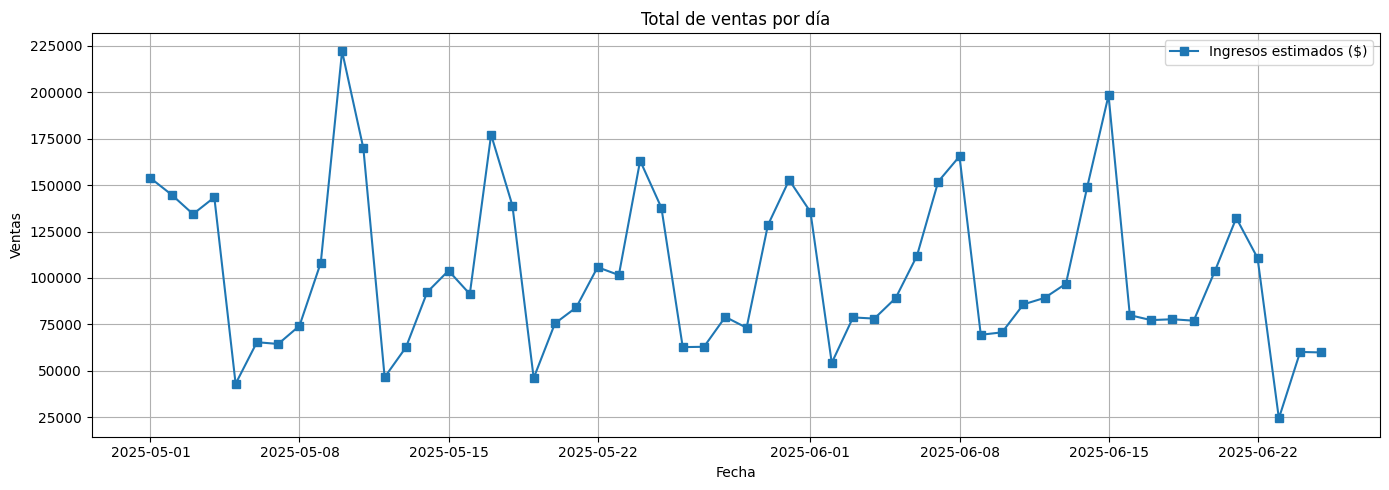

In [6]:

ventas_dia = df_ventas.groupby('fecha').agg(
    unidades_vendidas=('VENTAS', 'sum'),
    ingresos_estimados=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum())
).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(ventas_dia['fecha'], ventas_dia['ingresos_estimados'], marker='s', label='Ingresos estimados ($)')
plt.title('Total de ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


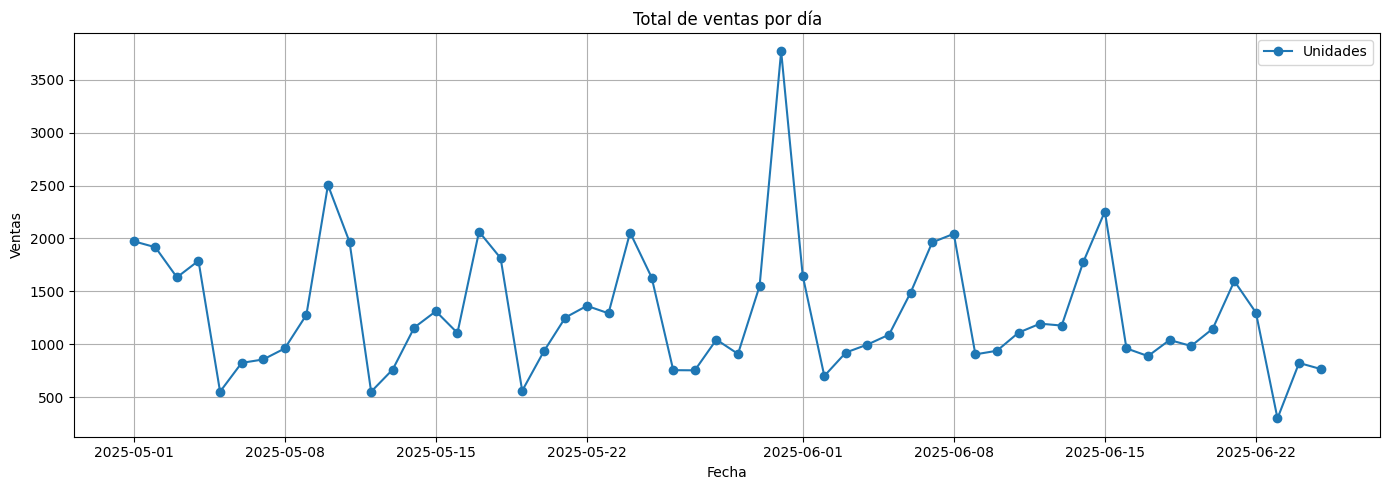

In [7]:

plt.figure(figsize=(14, 5))
plt.plot(ventas_dia['fecha'], ventas_dia['unidades_vendidas'], marker='o', label='Unidades')
plt.title('Total de ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**✅ Total de ventas por clasificación**

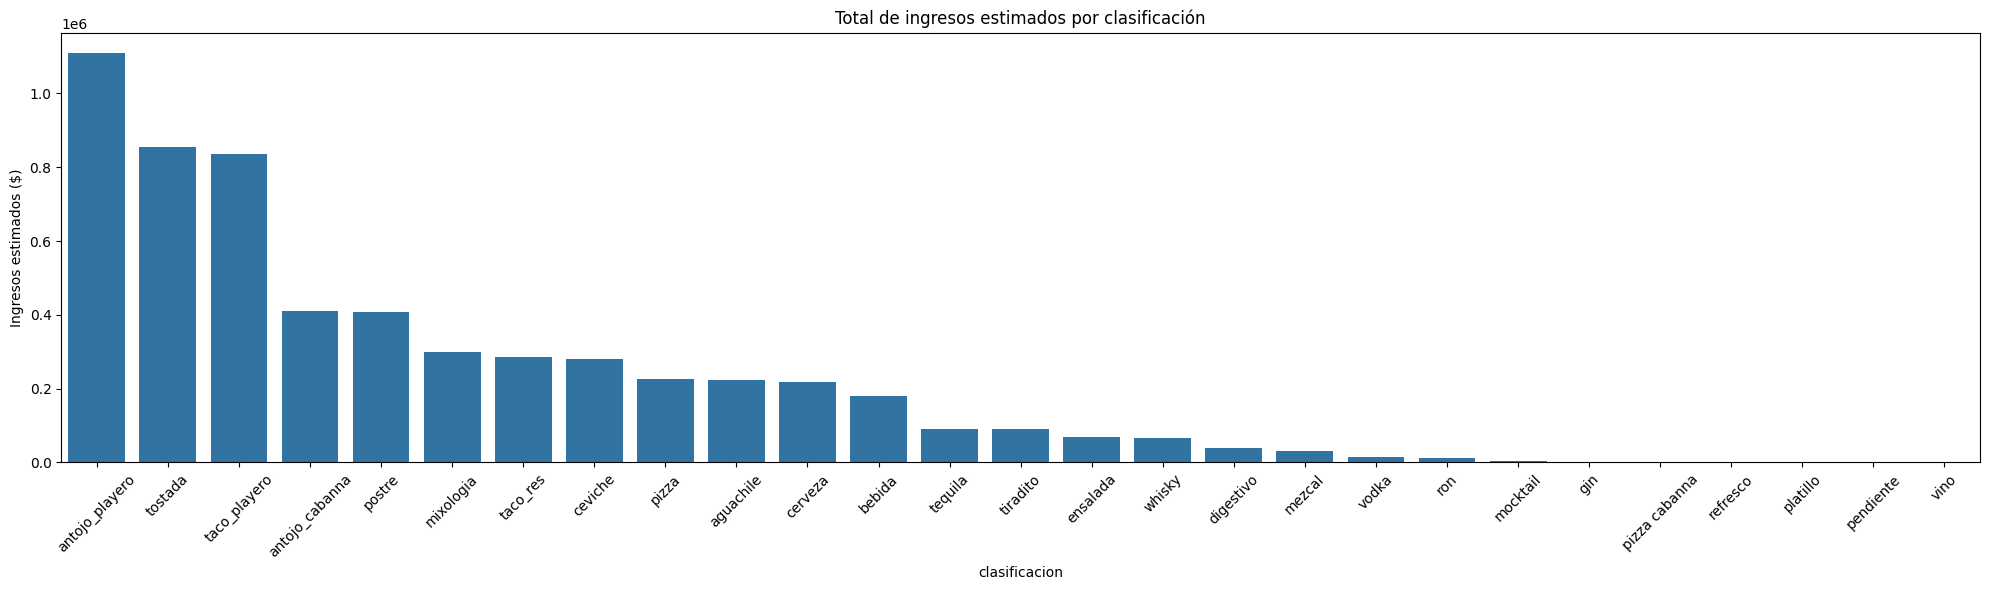

In [8]:

ventas_clasificacion = df_ventas.groupby('clasificacion').agg(
    unidades_vendidas=('VENTAS', 'sum'),
    ingresos_estimados=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum())
).sort_values(by='ingresos_estimados', ascending=False).reset_index()

import seaborn as sns

plt.figure(figsize=(20, 6))
sns.barplot(data=ventas_clasificacion, x='clasificacion', y='ingresos_estimados')
plt.xticks(rotation=45)
plt.title('Total de ingresos estimados por clasificación')
plt.ylabel('Ingresos estimados ($)')
plt.tight_layout()
plt.show()



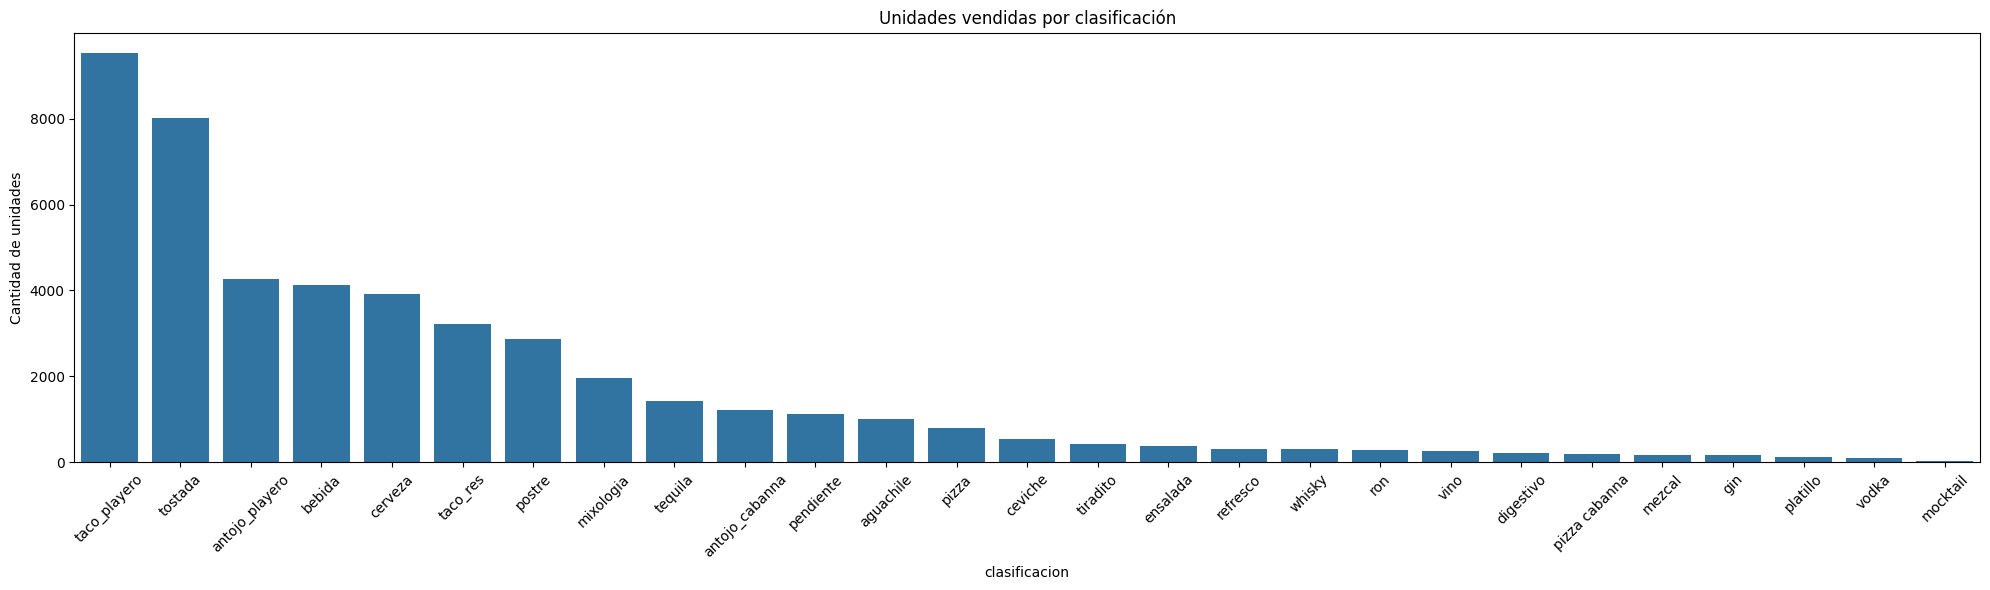

In [9]:
ventas_clasificacion.sort_values(by='unidades_vendidas', ascending=False, inplace=True)
plt.figure(figsize=(20, 6))
sns.barplot(data=ventas_clasificacion, x='clasificacion', y='unidades_vendidas')
plt.xticks(rotation=45)
plt.title('Unidades vendidas por clasificación')
plt.ylabel('Cantidad de unidades')
plt.tight_layout()
plt.show()

**✅ Top 10 artículos más vendidos**

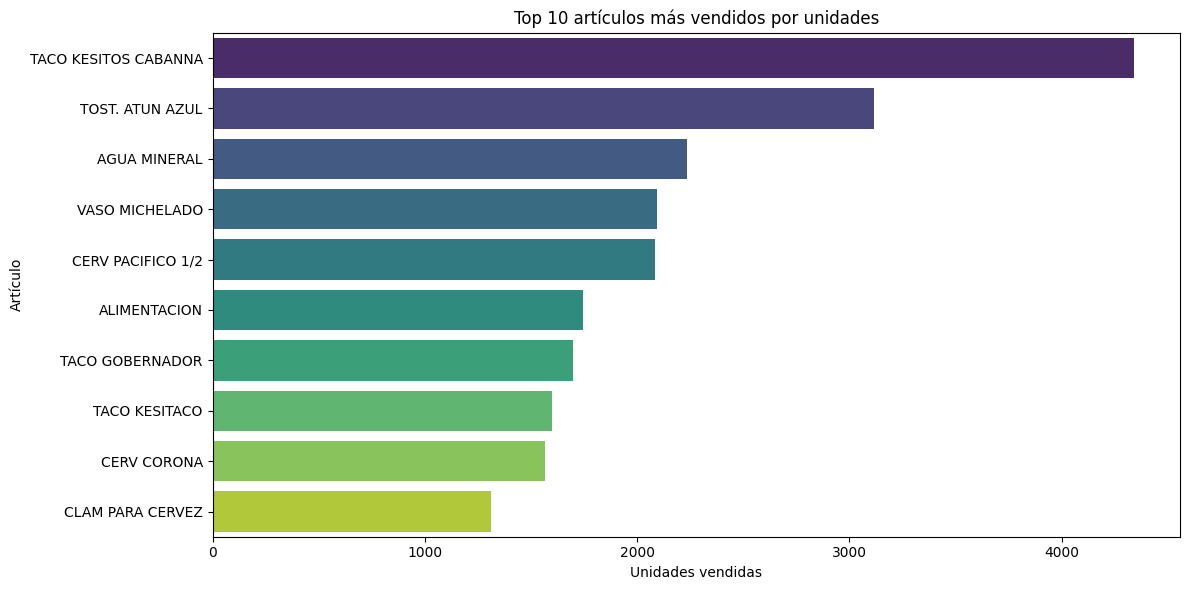

In [10]:

top_articulos = df_ventas.groupby('ARTICULO').agg(
    unidades_vendidas=('VENTAS', 'sum'),
    ingresos_estimados=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum())
).sort_values(by='unidades_vendidas', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_articulos,
    x='unidades_vendidas',
    y='ARTICULO',
    hue='ARTICULO',        # Asignamos hue igual a y
    dodge=False,
    palette='viridis',
    legend=False           # Evitamos duplicar etiquetas
)
plt.title('Top 10 artículos más vendidos por unidades')
plt.xlabel('Unidades vendidas')
plt.ylabel('Artículo')
plt.tight_layout()
plt.show()


**✅ Ventas totales por clasificación**

In [11]:

# Aseguramos que la fecha esté como datetime
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])

# Agrupamos por día
ventas_diarias = df_ventas.groupby('fecha').agg(
    total_ventas=('VENTAS', 'sum'),
    total_ingresos=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum())
).reset_index()

# Calculamos el ticket promedio diario
ventas_diarias['ticket_promedio'] = ventas_diarias['total_ingresos'] / ventas_diarias['total_ventas']

# Agregamos la clasificación más vendida por día
clasificacion_top = (
    df_ventas.groupby(['fecha', 'clasificacion'])['VENTAS'].sum()
    .reset_index()
    .sort_values(['fecha', 'VENTAS'], ascending=[True, False])
    .drop_duplicates('fecha')
    .rename(columns={'clasificacion': 'clasificacion_top'})
)

# Unimos todo en un solo DataFrame
ventas_diarias = ventas_diarias.merge(clasificacion_top[['fecha', 'clasificacion_top']], on='fecha', how='left')

ventas_diarias.head()


fecha  total_ventas  total_ingresos  ticket_promedio clasificacion_top
0 2025-05-01       1973.50       153755.00        77.909805      taco_playero
1 2025-05-02       1917.33       144751.58        75.496435      taco_playero
2 2025-05-03       1632.33       134376.58        82.321945      taco_playero
3 2025-05-04       1789.00       143393.00        80.152599      taco_playero
4 2025-05-05        550.50        43066.00        78.230699      taco_playero

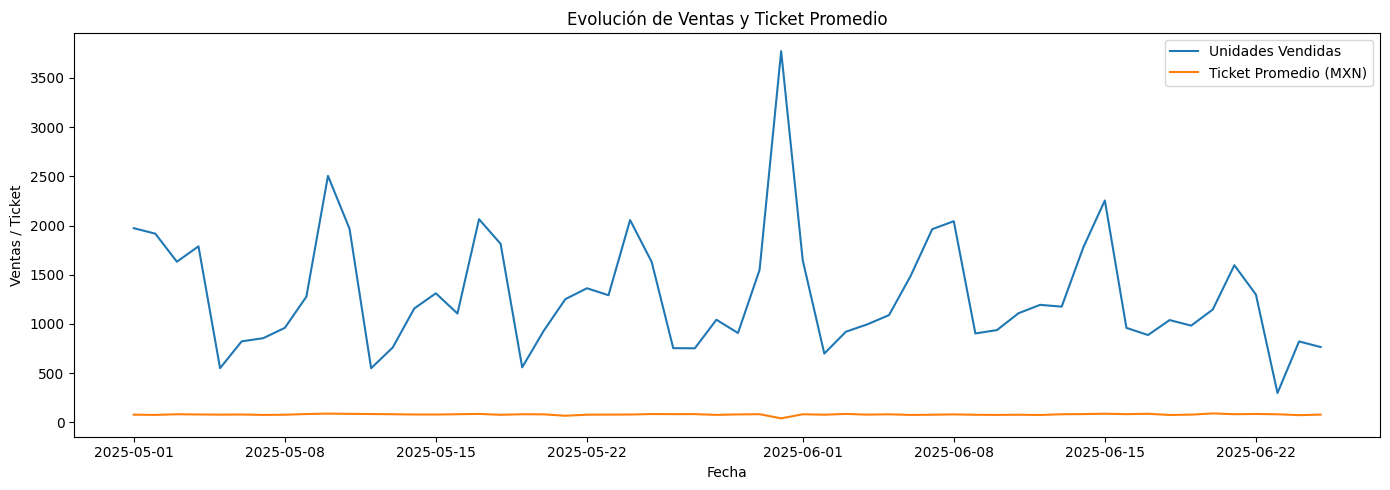

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
plt.figure(figsize=(14, 5))
sns.lineplot(data=ventas_diarias, x='fecha', y='total_ventas', label='Unidades Vendidas')
sns.lineplot(data=ventas_diarias, x='fecha', y='ticket_promedio', label='Ticket Promedio (MXN)')
plt.title("Evolución de Ventas y Ticket Promedio")
plt.xlabel("Fecha")
plt.ylabel("Ventas / Ticket")
plt.legend()
plt.tight_layout()
plt.show()


**✅ Gráfica de ingresos por clasificación**

C:\Users\julio\AppData\Local\Temp\ipykernel_22320\923358747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_clasificacion, x='ingresos_estimados', y='clasificacion', palette='Spectral')


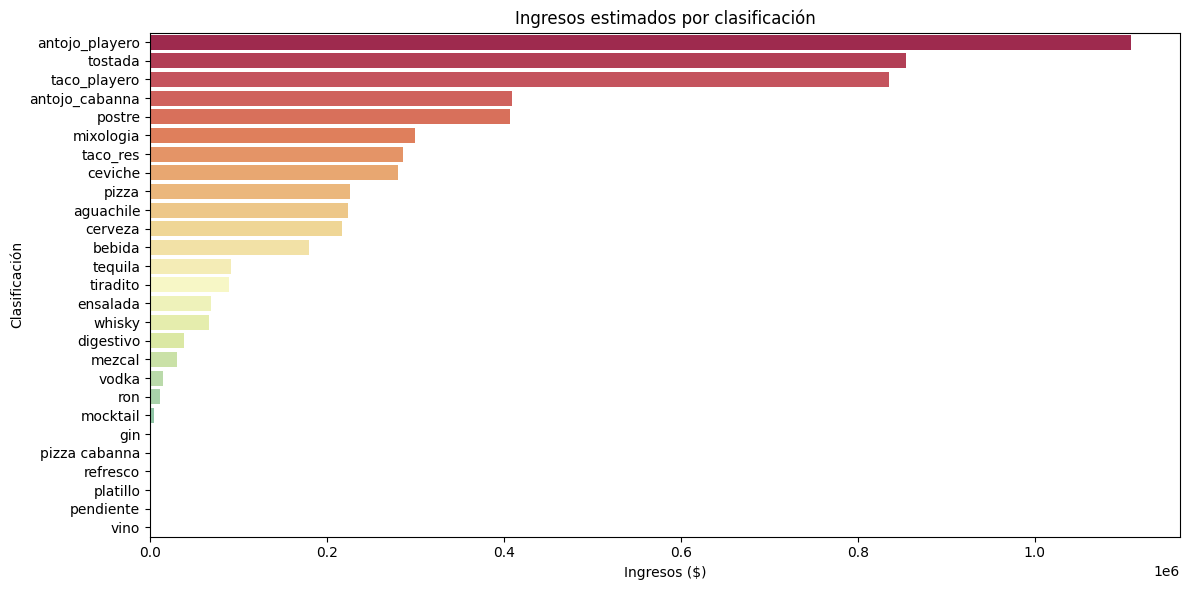

In [13]:

# Agrupamos por clasificación
ventas_por_clasificacion = df_ventas.groupby('clasificacion').agg(
    unidades_vendidas=('VENTAS', 'sum'),
    ingresos_estimados=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum()),
    precio_promedio=('precio', 'mean'),
    productos_unicos=('ARTICULO', 'nunique')
).sort_values(by='ingresos_estimados', ascending=False).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_clasificacion, x='ingresos_estimados', y='clasificacion', palette='Spectral')
plt.title('Ingresos estimados por clasificación')
plt.xlabel('Ingresos ($)')
plt.ylabel('Clasificación')
plt.tight_layout()
plt.show()


**✅ Porcentaje que representa cada categoría**

In [14]:

ventas_por_clasificacion['porcentaje_ingresos'] = (
    ventas_por_clasificacion['ingresos_estimados'] / ventas_por_clasificacion['ingresos_estimados'].sum()
) * 100

ventas_por_clasificacion[['clasificacion', 'ingresos_estimados', 'porcentaje_ingresos']]

clasificacion  ingresos_estimados  porcentaje_ingresos
0   antojo_playero          1108678.75            19.321826
1          tostada           854056.00            14.884313
2     taco_playero           835034.00            14.552801
3   antojo_cabanna           409137.00             7.130356
4           postre           406759.00             7.088912
5        mixologia           298970.00             5.210388
6         taco_res           285534.00             4.976228
7          ceviche           279944.82             4.878821
8            pizza           225771.00             3.934691
9        aguachile           224304.00             3.909124
10         cerveza           216950.00             3.780960
11          bebida           179186.00             3.122817
12         tequila            90971.00             1.585424
13        tiradito            89772.00             1.564528
14        ensalada            68501.00             1.193821
15          whisky            66095.00             1.151890
16       digestivo            37907.00             0.660635
17          mezcal            31005.00             0.540349
18           vodka            14597.00             0.254394
19             ron            10786.00             0.187976
20        mocktail             4002.00             0.069746
21             gin                0.00             0.000000
22   pizza cabanna                0.00             0.000000
23        refresco                0.00             0.000000
24        platillo                0.00             0.000000
25       pendiente                0.00             0.000000
26            vino                0.00             0.000000

**✅ Ventas totales por día**

In [15]:
# Asegúrate de que la columna sea datetime
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])

# Día de la semana (en inglés)
df_ventas['dia_semana'] = df_ventas['fecha'].dt.day_name()

# Establecer orden de los días para visualización
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_ventas['dia_semana'] = pd.Categorical(df_ventas['dia_semana'], categories=orden_dias, ordered=True)

ventas_por_dia = df_ventas.groupby('dia_semana').agg(
    unidades_vendidas=('VENTAS', 'sum'),
    ingresos_estimados=('precio', lambda x: (x * df_ventas.loc[x.index, 'VENTAS']).sum())
).reset_index()

ventas_por_dia



C:\Users\julio\AppData\Local\Temp\ipykernel_22320\3443660706.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_dia = df_ventas.groupby('dia_semana').agg(


dia_semana  unidades_vendidas  ingresos_estimados
0     Monday            5274.28           426796.48
1    Tuesday            6835.09           553714.24
2  Wednesday            8217.82           621746.32
3   Thursday            9782.45           766447.90
4     Friday           10952.32           886973.32
5   Saturday           17367.24          1282443.74
6     Sunday           14445.75          1199838.57

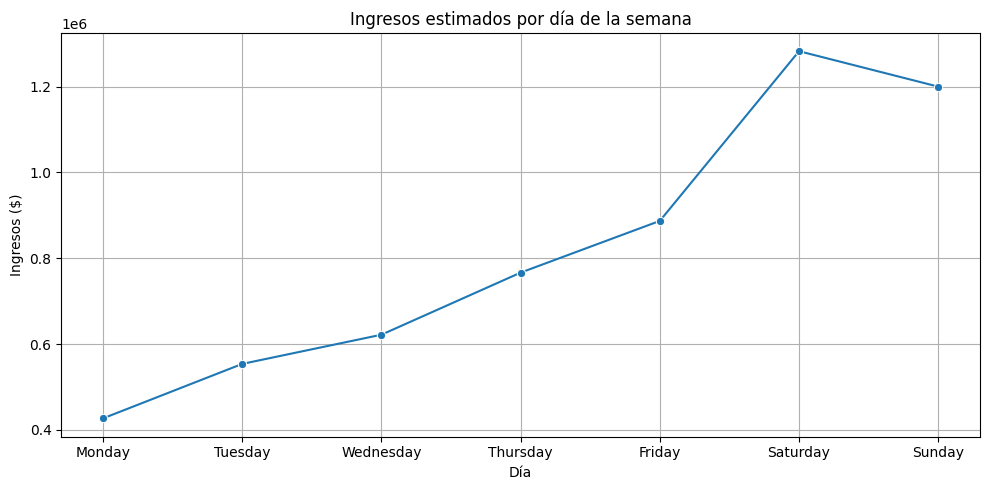

In [16]:

plt.figure(figsize=(10, 5))
sns.lineplot(data=ventas_por_dia, x='dia_semana', y='ingresos_estimados', marker='o')
plt.title('Ingresos estimados por día de la semana')
plt.xlabel('Día')
plt.ylabel('Ingresos ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


**✅ Ventas por día y clasificación**

In [17]:

import plotly.express as px
from ipywidgets import interact, widgets

# Agrupar ventas por día y clasificación
ventas_dia_clasif = df_ventas.groupby(['dia_semana', 'clasificacion']).agg(
    unidades_vendidas=('VENTAS', 'sum')
).reset_index()

# Extraer días únicos para selección
dias_disponibles = ventas_dia_clasif['dia_semana'].dropna().unique()

# Función para graficar dinámicamente por día
def graficar_por_dia(dia):
    df_filtrado = ventas_dia_clasif[ventas_dia_clasif['dia_semana'] == dia]
    fig = px.bar(df_filtrado, 
                 x='clasificacion', 
                 y='unidades_vendidas',
                 color='clasificacion',
                 title=f'Unidades vendidas el {dia}',
                 labels={'unidades_vendidas': 'Unidades vendidas', 'clasificacion': 'Clasificación'})
    fig.update_layout(showlegend=False)
    fig.show()

# Widget interactivo
interact(graficar_por_dia, dia=widgets.Dropdown(options=sorted(dias_disponibles)))



C:\Users\julio\AppData\Local\Temp\ipykernel_22320\3727794680.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_dia_clasif = df_ventas.groupby(['dia_semana', 'clasificacion']).agg(


interactive(children=(Dropdown(description='dia', options=('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday…

<function __main__.graficar_por_dia(dia)>

**✅ Calcular ticket estimado por venta**

In [18]:
# ======= Ticket promedio por día ========= #

import pandas as pd
import plotly.express as px

# Asegurarse de que no hay nulos en 'precio' y 'VENTAS'
df_ventas['total_estimado'] = df_ventas['VENTAS'] * df_ventas['precio']
ticket_diario = df_ventas.groupby('fecha').agg(
    total_diario=('total_estimado', 'sum'),
    transacciones=('cod', 'count')  # cuenta de registros
).reset_index()

ticket_diario['ticket_promedio'] = ticket_diario['total_diario'] / ticket_diario['transacciones']

# ======== Ticket promedio por día de la semana ======== #
ticket_semana = df_ventas.groupby('dia_semana').agg(
    total_semana=('total_estimado', 'sum'),
    transacciones=('cod', 'count')
).reset_index()

ticket_semana['ticket_promedio'] = ticket_semana['total_semana'] / ticket_semana['transacciones']

# Ordenar por día
ticket_semana['dia_semana'] = pd.Categorical(ticket_semana['dia_semana'], categories=orden_dias, ordered=True)
ticket_semana = ticket_semana.sort_values('dia_semana')

 ## ======== Ticket promedio por clasificación ======== #

ticket_clasif = df_ventas.groupby('clasificacion').agg(
    total=('total_estimado', 'sum'),
    transacciones=('cod', 'count')
).reset_index()

ticket_clasif['ticket_promedio'] = ticket_clasif['total'] / ticket_clasif['transacciones']
# Gráfico 1: Ticket promedio por día
fig1 = px.line(ticket_diario, x='fecha', y='ticket_promedio', title='Ticket promedio por día')

# Gráfico 2: Ticket promedio por día de la semana
fig2 = px.bar(ticket_semana, x='dia_semana', y='ticket_promedio', title='Ticket promedio por día de la semana')

# Gráfico 3: Ticket promedio por clasificación
fig3 = px.bar(ticket_clasif, x='clasificacion', y='ticket_promedio', title='Ticket promedio por clasificación')

fig1.show()
fig2.show()
fig3.show()


C:\Users\julio\AppData\Local\Temp\ipykernel_22320\4111904668.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:

import pandas as pd
import plotly.express as px

# Asegúrate de tener esta columna
df_ventas['total_estimado'] = df_ventas['VENTAS'] * df_ventas['precio']

# Agrupación
ventas_resumen = df_ventas.groupby('ARTICULO').agg(
    clasificacion=('clasificacion', 'first'),
    total_ingresos=('total_estimado', 'sum'),
    total_unidades=('VENTAS', 'sum')
).reset_index()

# Ticket promedio
ventas_resumen['ticket_promedio'] = ventas_resumen['total_ingresos'] / ventas_resumen['total_unidades']

# Filtrar artículos con al menos 30 unidades vendidas
ventas_filtrado = ventas_resumen[ventas_resumen['total_unidades'] >= 30]

# Gráfico interactivo
fig = px.scatter(
    ventas_filtrado,
    x='total_unidades',
    y='ticket_promedio',
    color='clasificacion',
    size='total_ingresos',
    hover_name='ARTICULO',
    title='Sweet Spot: Volumen vs. Ticket Promedio por Artículo',
    labels={'total_unidades': 'Unidades vendidas', 'ticket_promedio': 'Ticket promedio'}
)

fig.update_layout(template='plotly_white')
fig.show()


Qué representa el gráfico:
Eje X: Cantidad de unidades vendidas del artículo.

Eje Y: Ticket promedio por artículo.

Tamaño de burbuja: Ingresos totales generados por el artículo.

Color: Clasificación del artículo (mixología, taco, bebida, etc.).

Este gráfico te permite identificar:

Qué artículos venden mucho pero tienen ticket bajo (posibles oportunidades de upselling).

Qué artículos tienen ticket alto pero poca rotación (revisar si deben promoverse más).

Qué artículos están en el "sweet spot": ticket alto y volumen alto = estrellas del menú 🌟.

# 🧾 Resumen Ejecutivo – Análisis de Ventas Cabanna (Sucursal Av. México)

Este análisis explora el comportamiento de consumo de los clientes en la sucursal de Cabanna en Av. México durante mayo y junio de 2025. El objetivo es generar información accionable para mejorar el ticket promedio, la asistencia, el posicionamiento de marca y entender las preferencias de consumo.

---

## 🔍 Insights Clave

### 1. Clasificaciones más fuertes en ingresos
- **Antojo Playero** es la categoría con mayores ingresos y variedad de productos.
- **Ceviches** y **Postres** muestran buena rentabilidad y alto volumen.
- **Mixología** representa el 8% de los ingresos, con fuerte participación en fines de semana.

### 2. Artículos estrella
- 🥇 **TACO KESITOS CABANNA**: el más vendido (4341 unidades).
- 🍹 **CERV CORONA** y **VASO MICHELADO**: alto volumen, consumo de impulso.
- 🧊 **AGUA MINERAL**: muy vendida, bajo margen.

### 3. Ticket promedio por día
- 📈 **Sábados** ($1667) y **Domingos** ($1497) tienen el ticket más alto.
- 📉 **Lunes y Martes** son los días más débiles.

### 4. Consumo por día y categoría
- Las **Tostadas** y **Tacos Playeros** dominan la mayoría de los días.
- **Mixología**, **Postres** y **Bebidas alcohólicas** tienen mayor peso el fin de semana.

### 5. Mixología y bebidas alcohólicas
- Existen más de 15 subcategorías de bebidas alcohólicas, pero su participación individual es baja.
- Alta fragmentación = oportunidad de consolidar o reempaquetar.

---

## 💡 Estrategias de Negocio

### 🥂 A. Aumentar ticket promedio
- Ofrecer **combos premium** (taco + mixología + postre).
- Incentivar consumo de productos > $300 con descuentos en días de baja afluencia.

### 📆 B. Incrementar visitas en días bajos
- Crear campañas para **lunes y martes**:
  - “Martes de tostadas ilimitadas”
  - “Lunes de coctel y ceviche”

### 📍 C. Fortalecer posicionamiento de marca
- Enfatizar el concepto de **“botanero premium”** aprovechando la alta venta en mixología.
- Resaltar identidad gourmet con postres, cortes y vinos.

### 🧠 D. Rediseñar menú
- Incluir recomendaciones dinámicas:
  - “Lo más vendido hoy”
  - “Combo de la semana”

---

## 🔁 Recomendaciones de Análisis Futuro

1. **Modelo Huff de Atracción**:
   - Estimar cuánta clientela se retiene y cuánta se pierde ante la competencia cercana.

2. **Mapa Competitivo en Google Maps**:
   - Comparación visual de Cabanna frente a restaurantes similares (reseñas, fotos, precios).

3. **Análisis de Retención y Abandono**:
   - Si se tiene historial por cliente: identificar patrones de abandono o cambio de consumo.

---

## 📊 Tendencias de Consumo Detectadas en Cabanna – Av. México

### 1. 🐙 Predominio de mariscos como base del consumo

- Clasificaciones como `antojo_playero`, `ceviche`, `aguachile`, `tostada` y `taco_playero` concentran **más del 50% de las unidades vendidas**.
- A pesar del reposicionamiento hacia un centro botanero, los platillos de mar conservan protagonismo.
- **Insight**: El ADN marisquero sigue siendo el pilar de consumo. Debe conservarse como eje central.

---

### 2. 🍸 Creciente rol de la mixología como experiencia

- Mixología registra **5,398 unidades vendidas** y **más de $970 mil pesos en ingresos**.
- Su consumo se dispara los sábados (hasta 2,600 unidades en un solo día).
- **Insight**: El cliente asocia Cabanna con coctelería elaborada, especialmente en fines de semana.

---

### 3. 🍰 Postres y bebidas como parte de una experiencia completa

- `postre`, `digestivo` y `mocktail` suman más de **1 millón de pesos en ingresos combinados**.
- Se consumen consistentemente después de los platos principales.
- **Insight**: El cliente no solo come, **vive una experiencia completa** (entrada + plato + bebida + postre).

---

### 4. 🍺 Fragmentación en bebidas alcohólicas

- Subcategorías como `tequila`, `ginebra`, `mezcal`, `whisky`, `ron`, etc. tienen alta variedad pero bajo volumen por producto.
- Esto genera dispersión en la oferta y dificulta la toma de decisión del cliente.
- **Insight**: Hay oportunidad de simplificar la oferta de destilados o crear combos temáticos (ej. flight de tequilas, favoritos de la casa).

---

### 5. 📅 Concentración de consumo en fines de semana

- El **sábado representa más del 20% del total de ingresos** del periodo.
- Días entre semana como lunes y martes están muy por debajo en ticket y unidades.
- **Insight**: La estrategia de promociones debe diferenciarse por día. **Sábado = experiencia gourmet + mixología / Lunes = fidelización + promociones.**


## Clustering de Productos


- Qué tipo de productos se consumen juntos?

- ¿Qué segmentos de productos tienen comportamientos similares en precio, unidades o ingresos?

- ¿Cómo adaptar el menú o promociones a esos segmentos?

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Copiar el DataFrame
df_clustering = ventas_filtrado[['ARTICULO', 'clasificacion', 'total_unidades', 'total_ingresos', 'ticket_promedio']].copy()

# Normalizar las columnas numéricas
X = df_clustering[['total_unidades', 'total_ingresos', 'ticket_promedio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\julio\OneDrive\Documentos\Trabajo\IdeasFrscas\mi_entorno\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\julio\OneDrive\Documentos\Trabajo\IdeasFrscas\mi_entorno\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\subpro

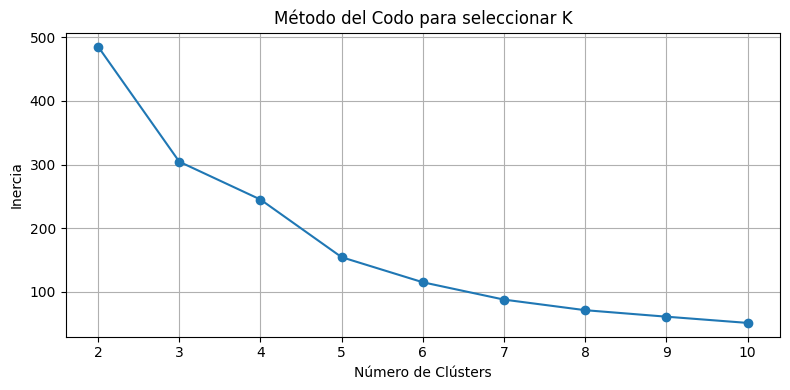

In [21]:

# Probar diferentes valores de K
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para seleccionar K')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# Ajustar KMeans con el número óptimo (puedes cambiar K según el gráfico)
kmeans = KMeans(n_clusters=4, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(X_scaled)


In [23]:
# Ver agrupamiento promedio por clúster
cluster_summary = df_clustering.groupby('cluster').agg({
    'total_unidades': 'mean',
    'total_ingresos': 'mean',
    'ticket_promedio': 'mean',
    'ARTICULO': 'count'
}).rename(columns={'ARTICULO': 'num_articulos'})

import plotly.express as px
fig = px.scatter_3d(
    df_clustering,
    x='total_unidades',
    y='total_ingresos',
    z='ticket_promedio',
    color='cluster',
    hover_data=['ARTICULO', 'clasificacion']
)
fig.update_layout(title='Clustering de artículos según consumo')
fig.show()


In [24]:
import pandas as pd
pd.set_option('display.max_rows', None)  # para ver todo

cluster_detalle = df_clustering.groupby('cluster').agg(
    unidades_totales=('total_unidades', 'sum'),
    ingresos_totales=('total_ingresos', 'sum'),
    ticket_promedio_medio=('ticket_promedio', 'mean'),
    articulos_unicos=('ARTICULO', 'count'),
    clasificaciones_distintas=('clasificacion', pd.Series.nunique)
).reset_index()

cluster_detalle


cluster  unidades_totales  ingresos_totales  ticket_promedio_medio  \
0        0          26725.63        3207829.75             163.559524   
1        1          32753.75         125802.00               4.581197   
2        2           3388.57        1329556.82             429.222222   
3        3           8393.00         976761.00             160.333333   

   articulos_unicos  clasificaciones_distintas  
0                84                         20  
1               117                         15  
2                18                          4  
3                 3                          3

In [25]:
# Listar todos los productos agrupados por clúster
productos_por_cluster = df_clustering[['cluster', 'ARTICULO', 'clasificacion', 'total_unidades', 'total_ingresos', 'ticket_promedio']].sort_values('cluster')

## Clúster 0 – “Consumo Estándar y Amplio”

**Descripción:**
- Gran diversidad de productos.
- Ticket promedio medio-alto (~$100–$300), muchos entre $120–$200.
- Entran bebidas sin alcohol, coctelería, platillos de entrada, pizzas, postres comunes, algunos tacos.

**Clasificaciones dominantes:** mocktails, mixología, postres, tostadas, tacos, digestivos.

**Perfil de consumo:**
- Frecuente entre semana y fines de semana.
- Ideal para acompañar consumo de volumen: comidas grupales, sobremesas.

**Estrategias:**
- Promociones cruzadas con combos: bebida + taco + postre.
- Ofertas tipo 2x1 en happy hour para productos de este grupo.

--- 

## Clúster 1 – “Éxitos del Menú”

**Descripción:**
- Productos con **alta rotación** y buen ingreso acumulado.
- Ticket promedio moderado ($80–$200).
- Incluye los artículos más vendidos: tacos gobernador, taco kesitaco, tostada esp. cam, volcan dulce leche, micheladas, rib eye cabannero.

**Clasificaciones dominantes:** tacos, tostadas, postres estrella, digestivos comunes, ceviches y agua embotellada.

**Perfil de consumo:**
- Alto volumen. Core del menú. Alta popularidad y fidelidad.

**Estrategias:**
- No moverlos del menú sin pruebas A/B.
- Usarlos como **anzuelo en promociones** (“elige 1 éxito del menú + bebida”).
- Estrategia de remarketing para repetición.

---

## Clúster 2 – “Botaneros de Alto Volumen”

**Descripción:**
- Productos con altísimo volumen vendido (más de 2000 unidades en muchos casos).
- Ticket promedio bajo–medio ($88–$177).
- Alto ingreso total por su volumen (tostadas, tacos botaneros, micheladas, agua mineral, etc.)

**Clasificaciones dominantes:** mixología, tostadas, postres populares, tacos playeros, bebidas básicas.

**Perfil de consumo:**
- Perfecto para fines de semana, mesas grandes, ambiente relajado o de fiesta.
- Perfil típicamente **botanero**, enfocado en compartir.

**Estrategias:**
- Paquetes de grupo (4 tostadas + 4 bebidas).
- Marketing visual con videos de preparación, énfasis en disfrute casual.
- Ajustes al diseño del menú para destacar estos productos como "Favoritos de la Casa".

---

## Clúster 3 – “Gourmet o Premium Bajo Demanda”

**Descripción:**
- Productos con ticket promedio muy alto ($300–$800+).
- Volumen bajo pero ingresos significativos por unidad (vino, rib eye, callo de hacha, camarones especiales).

**Clasificaciones dominantes:** antojo cabanna, ceviche, vino tinto, especiales de mariscos.

**Perfil de consumo:**
- Clientes de ticket alto, ocasiones especiales.
- Atrae a turistas o comensales de mayor poder adquisitivo.

**Estrategias:**
- Destacar en secciones del menú tipo “Selección del Chef”.
- Upselling del mesero (sugerencias personalizadas).
- Ofertas limitadas tipo “Solo hoy” o “Solo 10 unidades por día”.

C:\Users\julio\AppData\Local\Temp\ipykernel_22320\2824383347.py:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



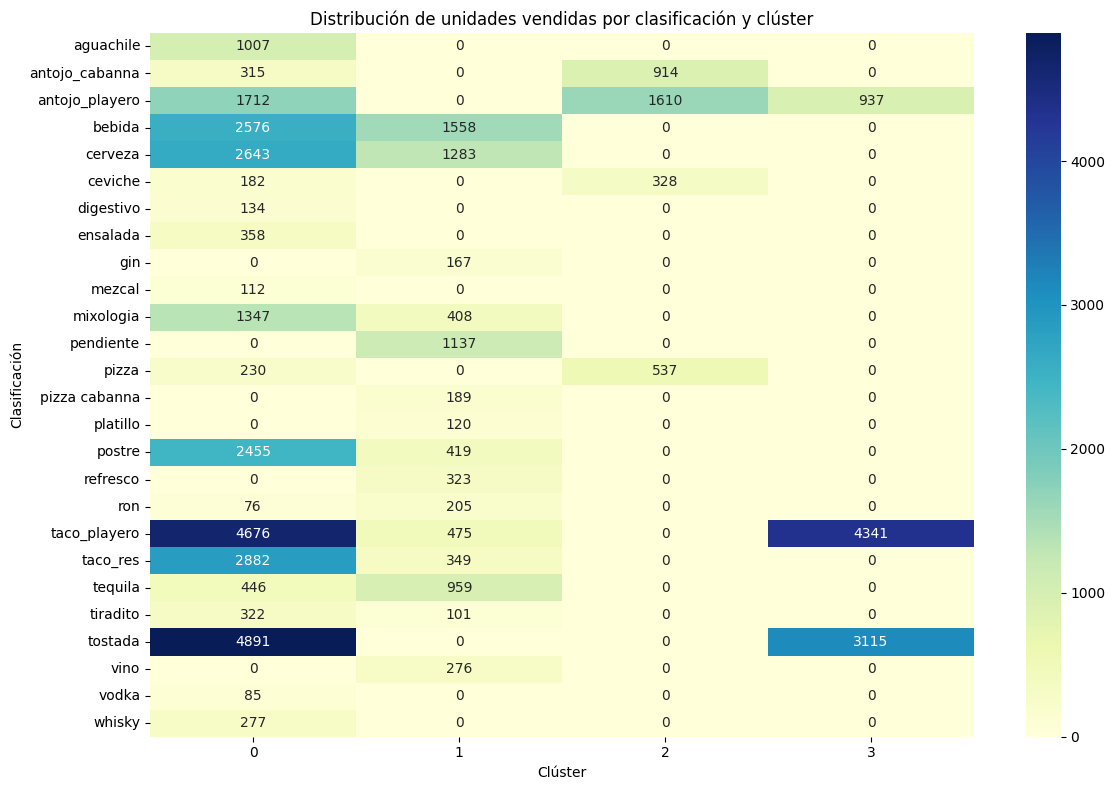

In [26]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos del cluster (suponiendo que ya están disponibles en un DataFrame llamado df_clusters)
df_clusters = productos_por_cluster.copy()

# Top productos por clúster
top_por_cluster = (
    df_clusters.groupby('cluster')
    .apply(lambda x: x.sort_values('total_unidades', ascending=False).head(10))
    .reset_index(drop=True)
)

# Gráfico 1: Top productos por clúster - gráfico interactivo
fig1 = px.bar(
    top_por_cluster,
    x="ARTICULO",
    y="total_unidades",
    color="cluster",
    facet_col="cluster",
    title="Top 10 productos por clúster (unidades vendidas)",
    hover_data=["clasificacion", "ticket_promedio", "total_ingresos"],
    height=600
)

# Gráfico 2: Mapa de calor por clúster y clasificación (para entender peso de categorías)
pivot = df_clusters.pivot_table(
    index='clasificacion',
    columns='cluster',
    values='total_unidades',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Distribución de unidades vendidas por clasificación y clúster")
plt.xlabel("Clúster")
plt.ylabel("Clasificación")
plt.xticks(rotation=0)
plt.tight_layout()


In [28]:
import plotly.express as px

# Suponiendo que el DataFrame se llama df_clusters
# Asegúrate de tener estas columnas: ['cluster', 'ARTICULO', 'clasificacion', 'total_unidades']

fig = px.treemap(
    df_clusters,
    path=['cluster', 'clasificacion', 'ARTICULO'],
    values='total_unidades',
    color='cluster',
    color_continuous_scale='Tealgrn',
    title='Árbol interactivo: Consumo por clúster y clasificación'
)
fig.show()


ValueError: ('None entries cannot have not-None children', ('0', 'aguachile', 'AGUACH DE LA TIA'))

In [29]:
# Obtener top 5 artículos por clúster según unidades vendidas
top_productos_cluster = (
    df_clusters.sort_values(['cluster', 'total_unidades'], ascending=False)
    .groupby('cluster')
    .head(5)
)

# Gráfico de barras
fig = px.bar(
    top_productos_cluster,
    x='total_unidades',
    y='ARTICULO',
    color='cluster',
    orientation='h',
    facet_col='cluster',
    title='Top 5 artículos por clúster de consumo',
    height=600
)
fig.update_layout(showlegend=False)
fig.show()


# Pre Analisis base de datos Cabanna

In [ ]:
# --- Librerías ---
import pandas as pd
import sys
import numpy as np
import re
from datetime import datetime

sys.path.append('../Funciones')
from Funciones_v2 import  leer_archivo, diagnostico_base_datos_pdf, limpiar_base_vivienda

def procesar_numero(numero):
    # Convertir a string y eliminar caracteres no numéricos
    numero = str(numero)
    numero = re.sub(r'\D', '', numero)

    # Si el número está vacío
    if not numero or numero in ['0', '']:
        return "Sin Número"

    # Longitud 12 y empieza con 52 → +52 (XXX) XXX XXXX
    if len(numero) == 12:
        parte0 = numero[0:2]
        lada = numero[2:5]
        parte1 = numero[5:8]
        parte2 = numero[8:]
        return f'+{parte0} ({lada}) {parte1} {parte2}'

    # Longitud 10 → (XXX) XXX XXXX
    elif len(numero) == 10:
        lada = numero[0:3]
        parte1 = numero[3:6]
        parte2 = numero[6:]
        return f'({lada}) {parte1} {parte2}'
    # Caso inválido
    else:
        return "Sin Número"

def corregir_correo(correo):
    if pd.isna(correo) or not isinstance(correo, str) or correo.strip() == '':
        return "Correo inválido"
    
    correo = correo.strip().lower()

    # Si no tiene @ pero parece válido, intentar inferir posición
    if '@' not in correo:
        # Buscar patrones comunes como gmailcom, hotmailmx
        if 'gmail' in correo or 'hotmail' in correo or 'yahoo' in correo:
            partes = re.split(r'(gmail|hotmail|yahoo)', correo)
            if len(partes) >= 3:
                usuario = partes[0]
                dominio = partes[1] + partes[2]
                correo = usuario + '@' + dominio

    # Arreglar dominios sin punto final
    correo = re.sub(r'(@[\w\-]+)(com|mx|net|org)$', r'\1.\2', correo)

    # Validar si es un formato correcto ahora
    regex = r"^[\w\.-]+@[\w\.-]+\.\w+$"
    if re.match(regex, correo):
        return correo
    else:
        return "Correo inválido"

def convertir_columnas_numericas(df, columnas):
    for col in columnas:
        # Eliminar caracteres no numéricos comunes
        df[col] = df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
        # Convertir a número (entero o flotante)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    return df



**Limpieza base de datos**

In [ ]:
# Data comensales

# Ruta del archivo 1
# #rt_comensales = "C:/Users/julio/OneDrive/Documentos/Trabajo/IdeasFrscas/Cabanna/Base de datos/DATA COMENSALES 1 AÑO CABANNA.xlsx" 
#dt_comensales = leer_archivo(rt_comensales)
#dt_comensales.head()

# Ruta del archivo 2
rt_comensales = "C:/Users/julio/OneDrive/Documentos/Trabajo/IdeasFrscas/Cabanna/Base de datos/detallado comensales 1 año cabanna.csv"
dt_comensales = leer_archivo(rt_comensales)


# Separar la columna 'Restaurante'
partes = dt_comensales['Restaurante'].str.split('-', expand=True)
dt_comensales['Ciudad'] = partes[1].str.strip()
dt_comensales['Id Sucursal'] = partes[2].fillna(partes[1]).str.strip()

# Eliminar columna original
dt_comensales = dt_comensales.drop(columns=['Restaurante'])

# Reordenar columnas: 'Ciudad' y 'Id Sucursal' al principio
columnas_nuevas = ['Ciudad', 'Id Sucursal']
otras_columnas = [col for col in dt_comensales.columns if col not in columnas_nuevas]
dt_comensales = dt_comensales[columnas_nuevas + otras_columnas]

# Formato de nombres
dt_comensales['Nombre del comensal'] = dt_comensales['Nombre del comensal'].str.title()
# Limpiar espacios
dt_comensales['Nombre del comensal'] = dt_comensales['Nombre del comensal'].str.strip().replace(r'\s+', ' ', regex=True)
# Eliminar símbolos raros o números
dt_comensales['Nombre del comensal'] = dt_comensales['Nombre del comensal'].str.replace(r'[^A-Za-zÁÉÍÓÚáéíóúÑñ\s]', '', regex=True)
# Validar nombres válidos
palabras_invalidas = ['cliente', 'reservacion', 'reservación', 'anonimo', 'desconocido']
dt_comensales = dt_comensales[~dt_comensales['Nombre del comensal'].str.lower().isin(palabras_invalidas)]
# Filtrar por longitud mínima
dt_comensales = dt_comensales[dt_comensales['Nombre del comensal'].str.len() >= 3]

# Valiidar numeros de teléfono
dt_comensales['Número de teléfono corregido'] = dt_comensales['Número de teléfono'].apply(procesar_numero)
# Reordenar para colocar la nueva columna justo después de la original
cols = list(dt_comensales.columns)
if 'Número de teléfono corregido' in cols:
    cols.remove('Número de teléfono corregido')  # evitar duplicado

idx = cols.index('Número de teléfono')
cols = cols[:idx+1] + ['Número de teléfono corregido'] + cols[idx+1:]
dt_comensales = dt_comensales[cols]


# Corregir correos electrónicos
dt_comensales['Correo electrónico corregido'] = dt_comensales['Correo electrónico'].apply(corregir_correo)
# Reubicar la columna justo después del correo original
cols_1 = list(dt_comensales.columns)
if 'Correo electrónico corregido' in cols_1:
    cols_1.remove('Correo electrónico corregido')  # evitar duplicado

idx_1 = cols_1.index('Correo electrónico')
cols_1 = cols_1[:idx_1+1] + ['Correo electrónico corregido'] + cols_1[idx_1+1:]
dt_comensales = dt_comensales[cols_1]

# Convertir columnas a numéricas
columnas_numericas = [
    'Futuras reservas totales',
    'Visitas totales',
    'Cancelaciones totales',
    'Ausencias totales'
]
dt_comensales = convertir_columnas_numericas(dt_comensales, columnas_numericas)

# Convertir fechas a formato datetime
dt_comensales['Visita más reciente'] = pd.to_datetime(
    dt_comensales['Visita más reciente'], format='%d/%m/%Y %H:%M', errors='coerce'
)

dt_comensales = dt_comensales.iloc[:, :-3]
#dt_comensales = dt_comensales.drop(columns=dt_comensales.columns[5])  # Recuerda: índice 6 = 7ma columna

dt_comensales.head()

**Clasificar a los clientes que solo han ido en 2024 y 2025**

In [ ]:
# Extraer el año
dt_comensales['Año última visita'] = dt_comensales['Visita más reciente'].dt.year

# Filtrar por años 2024 o 2025
df_visitas_recientes = dt_comensales[
    dt_comensales['Año última visita'].isin([2024, 2025])
]
df_visitas_recientes['Visitas totales'].describe()


In [ ]:
# Crear columna agrupada con valores 1 a 10 y "+10"
df_visitas_recientes['Grupo Visitas'] = df_visitas_recientes['Visitas totales'].apply(
    lambda x: str(int(x)) if x <= 10 else '+10'
)

# Contar clientes por grupo de visitas
tabla_frecuencias = df_visitas_recientes['Grupo Visitas'].value_counts().sort_index()

# Mostrar como tabla ordenada
tabla_frecuencias = tabla_frecuencias.rename_axis('Visitas Totales').reset_index(name='Número de Clientes')

tabla_frecuencias

# Convertir los valores de visitas a enteros, menos el '+10'
def ordenar_grupo(grupo):
    try:
        return int(grupo)
    except:
        return 999  # Para que '+10' quede al final

# Ordenar la tabla usando la función
tabla_frecuencias['Orden'] = tabla_frecuencias['Visitas Totales'].apply(ordenar_grupo)
tabla_frecuencias = tabla_frecuencias.sort_values('Orden').drop(columns='Orden')

tabla_frecuencias

### Clasificación extendida de clientes según comportamiento

La clasificación de clientes se basa en dos variables clave:

- **Visitas totales**: número de veces que el cliente ha asistido en el último año.
- **Días desde la última visita**: diferencia entre la fecha actual y la última vez que asistió.

| Clasificación               | Visitas Totales     | Días desde Última Visita        | Descripción rápida                                              |
|----------------------------|----------------------|----------------------------------|-----------------------------------------------------------------|
| **VIP**                    | 36 o más             | ≤ 60 días                        | Clientes de alto valor, asisten más de 3 veces por mes.         |
| **Frecuente semanal**      | 24 a 35              | ≤ 60 días                        | Asisten al menos 2 veces por mes.                               |
| **Frecuente mensual**      | 12 a 23              | ≤ 90 días                        | Clientes constantes, mínimo 1 vez por mes.                      |
| **Frecuente antiguo**      | 12 o más             | > 90 días                        | Fueron frecuentes, pero dejaron de asistir.                     |
| **Cliente valioso perdido**| Más de 20            | > 50 días                        | Clientes importantes que han dejado de asistir.                 |
| **Ocasional reciente**     | 3 a 11               | ≤ 90 días                        | Clientes esporádicos que han asistido recientemente.            |
| **Ocasional inactivo**     | 3 a 11               | > 90 días                        | Clientes esporádicos que dejaron de asistir.                    |
| **Potencial frecuente**    | 1 a 2                | > 30 y ≤ 60 días                 | Pueden convertirse en frecuentes si se reactivan pronto.        |
| **Nuevo**                  | 1 a 2                | ≤ 30 días                        | Clientes recién adquiridos.                                     |
| **Perdido**                | 1 a 2                | > 60 días                        | Clientes que no regresaron tras probar el restaurante.          |
| **Sin datos válidos**      | 0 o NaN              | NaT o NaN                        | No se tiene historial o datos incompletos.                      |


In [ ]:
# Calcular días desde última visita
hoy = pd.to_datetime(datetime.now().date())
df_visitas_recientes['Días desde última visita'] = (hoy - df_visitas_recientes['Visita más reciente']).dt.days

def clasificar_cliente_extendido(row):
    visitas = row['Visitas totales']
    dias = row['Días desde última visita']

    # Validación básica
    if pd.isna(visitas) or pd.isna(dias):
        return 'Sin datos válidos'

    # Cliente valioso perdido
    if visitas > 20 and dias > 50:
        return 'Cliente valioso perdido'

    # Clasificación estándar
    if visitas >= 36 and dias <= 60:
        return 'VIP'
    elif 24 <= visitas <= 35 and dias <= 60:
        return 'Frecuente semanal'
    elif 12 <= visitas < 24 and dias <= 90:
        return 'Frecuente mensual'
    elif visitas >= 12 and dias > 90:
        return 'Frecuente antiguo'
    elif 3 <= visitas < 12 and dias <= 90:
        return 'Ocasional reciente'
    elif 3 <= visitas < 12 and dias > 90:
        return 'Ocasional inactivo'
    elif visitas in [1, 2] and dias <= 30:
        return 'Nuevo'
    elif visitas in [1, 2] and 30 < dias <= 60:
        return 'Potencial frecuente'
    elif visitas in [1, 2] and dias > 60:
        return 'Perdido'
    else:
        return 'Sin datos válidos'

df_visitas_recientes['Clasificación cliente'] = df_visitas_recientes.apply(clasificar_cliente_extendido, axis=1)
df_visitas_recientes['Clasificación cliente'].value_counts()

**Lista de los clientes que se pueden contactar**

In [ ]:
# Crear un diccionario de DataFrames por sucursal
dfs_por_sucursal = {
    sucursal: df_sucursal
    for sucursal, df_sucursal in df_visitas_recientes.groupby('Id Sucursal')
}

columnas_deseadas = [
    'Ciudad',
    'Id Sucursal',
    'Nombre del comensal',
    'Número de teléfono',
    'Número de teléfono corregido',
    'Correo electrónico',
    'Correo electrónico corregido',
    'Días desde última visita',
    'Clasificación cliente'
]
# Lista de sucursales
sucursales = dt_comensales['Id Sucursal'].value_counts().index.tolist()

# Iterar por cada sucursal
for suc in sucursales:
    # Obtener el DataFrame de esa sucursal
    df_sucursal = dfs_por_sucursal[suc][columnas_deseadas]

    # Filtrar solo clientes con al menos número o correo válido
    df_contactables = df_sucursal[
        (df_sucursal['Número de teléfono'].notna()) |
        (df_sucursal['Correo electrónico corregido'] != 'Correo inválido')
    ]

    # Contar cuántos clientes hay por categoría
    conteo_por_categoria = df_contactables['Clasificación cliente'].value_counts()

    # Separar categorías con menos de 10 clientes (incluir completas)
    categorias_pequenas = conteo_por_categoria[conteo_por_categoria < 10]
    categorias_grandes = conteo_por_categoria[conteo_por_categoria >= 10]

    # Iniciar base
    df_final = pd.DataFrame()
    for categoria in categorias_pequenas.index:
        df_cat = df_contactables[df_contactables['Clasificación cliente'] == categoria]
        df_final = pd.concat([df_final, df_cat])

    # Calcular restantes para llegar a 100
    restantes = 100 - len(df_final)

    # Distribuir proporcionalmente entre grandes
    proporciones = categorias_grandes / categorias_grandes.sum()
    asignaciones = (proporciones * restantes).round().astype(int)

    # Asegurar mínimo 5 por categoría
    for cat in asignaciones.index:
        if asignaciones[cat] < 5:
            asignaciones[cat] = 5

    # Ajustar si excede 100
    exceso = df_final.shape[0] + asignaciones.sum() - 100
    if exceso > 0:
        while exceso > 0:
            for cat in asignaciones.index:
                if asignaciones[cat] > 5:
                    asignaciones[cat] -= 1
                    exceso -= 1
                    if exceso == 0:
                        break

    # Agregar datos balanceados
    for categoria in asignaciones.index:
        df_cat = df_contactables[df_contactables['Clasificación cliente'] == categoria]
        df_cat = df_cat.sort_values('Días desde última visita')  # más recientes
        df_final = pd.concat([df_final, df_cat.head(asignaciones[categoria])])

    # Reordenar columnas finales
    df_final = df_final[columnas_deseadas]

    # Obtener conteo por clasificación
    conteo = dfs_por_sucursal[suc]['Clasificación cliente'].value_counts()
    # Convertir a DataFrame y resetear índice
    conteo_df = conteo.reset_index()
    conteo_df.columns = ['Clasificación cliente', 'Número de clientes']
    # Guardar como CSV
    nombre_archivo = f"Resumen clasificaciones - {suc}.csv"
    conteo_df.to_csv(nombre_archivo, index=False, encoding='utf-8-sig')

    # Guardar archivo
    nombre_archivo = f"Información de los clientes en la sucursal {suc} para la sesios de grupo.csv"
    df_final.to_csv(nombre_archivo, index=False, encoding='utf-8-sig')
